# Homework 5. KNN - Handwritten digits

***Double Click here to edit this cell***

- Name: 김대현
- Student ID: 202000449
- Submission date: 24.05.23

### We have 1797 handwritten digits of size 8x8

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [ ]:
digits.target


array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# Do not run this cell when you submit you homework

print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Try with some handwritten images

Target is 4
Data is :

[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]


<Figure size 640x480 with 0 Axes>

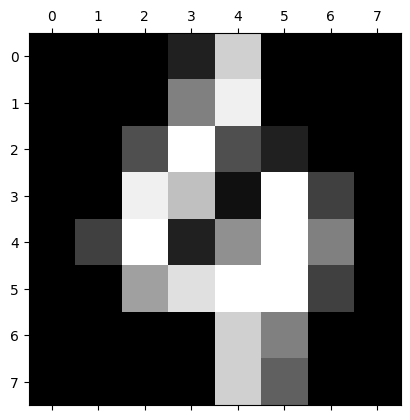

In [ ]:
# Do not run this cell when you submit you homework

import matplotlib.pyplot as plt

k = 100
print('Target is {}'.format(digits.target[k]))
print('Data is :\n')
print(digits.data[k].reshape(8,8))
plt.gray()
plt.matshow(digits.images[k])
plt.show()

### 주의: `train_test_split`의 `random_state`를 0이 아닌 다른 값으로 바꾸거나, 다시 데이터셋을 split하면 0점 처리됨

- you must set "random_state=0"" in "train_test_split"
- don't modify the random number seed (random_state)
- Split the data into training dataset (0.67 of the total data), test dataset(0.33 of the total data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, \
                                                    random_state=0)

# Problem 1 (10 pts) : 10

- We want to classify handwritten digits using **1 nearest neighbor classifier**

- import whatever you need
- Use sklearn 1 nearest neighbor classifier to classify digits
- Print confusion matrix, classification report, accuracy

- 우리는 1개의 가장 가까운 이웃 분류기를 사용하여 손으로 쓴 숫자를 분류하려고 합니다
- 필요한 것은 무엇이든 가져오기
- sklearn 1 neighbor 분류기를 사용하여 자릿수를 분류합니다
- 인쇄 혼동 매트릭스, 분류 보고서, 정확도

In [ ]:
# YOUR CODE HERE

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train, y_train)
y_predict=model1.predict(X_test)

confusion_matrix = np.zeros(100).reshape(10, 10).astype(int)
accuracy = 0

for row, col in zip(y_test, y_predict):
  confusion_matrix[row][col]+=1
  if row == col: accuracy+=1

cr = classification_report(y_test, y_predict)
accuracy=accuracy / len(y_test)

print('confusion matrix : \n')
print(confusion_matrix)
print('\n\nclassification_report : \n')
print(cr)
print('Average accuracy = {:.2f}%'.format(accuracy*100))

confusion matrix : 

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy            

My result:
```
confusion matrix :

[[49  0  0  0  0  0  0  0  0  0]
 [ 0 61  0  0  0  0  0  0  0  0]
 [ 0  0 62  0  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  1]
 [ 0  0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0  0 56  0  0]
 [ 0  2  0  1  0  0  0  0 64  0]
 [ 0  0  0  3  0  1  0  0  0 58]]


classification_report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.97      1.00      0.98        61
           2       1.00      1.00      1.00        62
           3       0.93      1.00      0.96        55
           4       1.00      1.00      1.00        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       1.00      1.00      1.00        56
           8       1.00      0.96      0.98        67
           9       0.98      0.94      0.96        62

    accuracy                           0.98       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.98      0.98       594

Average accuracy = 98.48%
```

# Problem 2 (30 pts) - Choose k : 15

- We want to classify handwritten digits using k nearest neighbor classifier
- Use dimensionality reduction technique like PCA or TSNE if necessary
- If you choose any hyperparameters and you did any transformation in your data, justify your choice and transformation.
- The justification must be code, data, or plotted images, **not your guess!!!**
- This must be a longer code.
- To justify your choice of hyperparameters, use visualization or plotting whenever possible.
- You may add as many cells as you want.
- To add a cell, insert->insert cell or click '+' button above in the notebook.
- you must set "random_state=0" in "train_test_split", "TSNE" or on any functions based on random numbers

### This will be evaluated based on average accuracy

- k개의 가장 가까운 이웃 분류기를 사용하여 손으로 쓴 숫자를 분류하려고 합니다
- 필요한 경우 PCA 또는 TSNE와 같은 차원 축소 기법 사용
- 하이퍼파라미터를 선택하고 데이터에서 변환을 수행한 경우 선택 및 변환을 정당화합니다.
- 그 이유는 코드, 데이터 또는 도표 이미지여야 합니다. **당신의 추측이 아닙니다
- 이 코드는 더 긴 코드여야 합니다.
- 하이퍼파라미터를 선택한 이유를 정당화하려면 가능한 한 시각화 또는 도표화를 사용합니다.
- 원하는 만큼 셀을 추가할 수 있습니다.
- 셀을 추가하려면 노트북에서 셀을 삽입하거나 위의 '+' 버튼을 클릭합니다.
- "train_test_split", "TSNE" 또는 난수를 기반으로 하는 임의의 함수에 대해 "random_state=0"을 설정해야 합니다

### 이는 평균 정확도를 기반으로 평가됩니다

In [ ]:
# ADD YOUR CELL
from sklearn.decomposition import PCA

# 정확도 계산 함수
def Accuracy(test,predict):
  score = 0
  for i, j in zip(test,predict):
    if i == j: score += 1
  return score / len(test)
acc_list = []

# 실험해 볼 하이퍼 파라미터 : PCA의 차원, k
for nComponent in range(1, 65):
  # PCA 모델 생성
  pca = PCA(n_components = nComponent,random_state = 0)
  # train 데이터에 PCA 적용
  trainX_PCA = pca.fit_transform(X_train)
  transform_matrix = pca.components_

  # test 데이터에도 PCA 적용
  testX_PCA = pca.transform(X_test)
  # testX_PCA = np.dot(transform_matrix.T,X_test)
  meanAcc = 0

  for k in range(1, 40, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(trainX_PCA, y_train)
    y_predict = model.predict(testX_PCA)
    accuracy = Accuracy(y_test, y_predict)
    acc_list.append([nComponent, k, accuracy])
acc_list = np.array(acc_list)
acc_list

array([[ 1.        ,  1.        ,  0.30976431],
       [ 1.        ,  3.        ,  0.31481481],
       [ 1.        ,  5.        ,  0.31481481],
       ...,
       [64.        , 35.        ,  0.94781145],
       [64.        , 37.        ,  0.94444444],
       [64.        , 39.        ,  0.93602694]])

#### 차원별 Accuracy 최대값 계산

In [ ]:
# 각 Accuracy max값 계산후, Column화
import pandas as pd
import matplotlib.pyplot as plt

df_acc = pd.DataFrame(acc_list,columns=['nComponent','k','Accuracy']) # acclist: 정확도를 저장한 리스트
aveAccNcom = df_acc.groupby('nComponent')['Accuracy'].mean()
aveAccNcom=pd.DataFrame(aveAccNcom)
aveAccNcom

,Accuracy
nComponent,
1.0,0.351768
2.0,0.614226
3.0,0.731145
4.0,0.834933
5.0,0.887963
...,...
60.0,0.963131
61.0,0.962963
62.0,0.962963


#### nComponent Accuracy 최대값 도출

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# nComponent Accuracy 최대값 도출
avg_accuracy_nCom = df_acc.groupby('nComponent')['Accuracy'].mean()
avg_accuracy_nCom = pd.DataFrame(avg_accuracy_nCom)
avg_accuracy_nCom

,Accuracy
nComponent,
1.0,0.351768
2.0,0.614226
3.0,0.731145
4.0,0.834933
5.0,0.887963
...,...
60.0,0.963131
61.0,0.962963
62.0,0.962963


#### nComponent Accuracy plot화

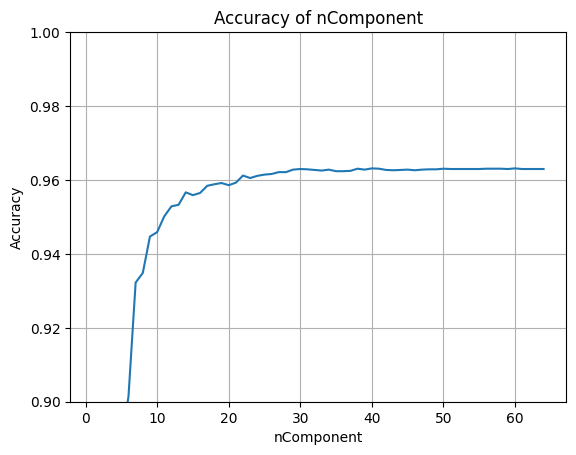

best nComponent(avg_case) : 39 


In [ ]:
plt.plot(avg_accuracy_nCom.index,avg_accuracy_nCom['Accuracy'])
plt.xlabel('nComponent')
plt.ylabel('Accuracy')
plt.title('Accuracy of nComponent')
plt.ylim(0.9,1.0)
plt.grid(True)
plt.show()
print("best nComponent(avg_case) : %d "%np.argmax(avg_accuracy_nCom['Accuracy']))

#### k_Accuracy(n_neighbors) 최대값 도출

In [ ]:
# k Accuracy 최대값 도출
avg_Accuracy_K=df_acc.groupby('k')['Accuracy'].mean()
avg_Accuracy_K=pd.DataFrame(avg_Accuracy_K)
avg_Accuracy_K

,Accuracy
k,
1.0,0.955598
3.0,0.955414
5.0,0.952415
7.0,0.953309
9.0,0.950153
11.0,0.945918
13.0,0.944707
15.0,0.944629
17.0,0.941472


#### K Accuracy plot화

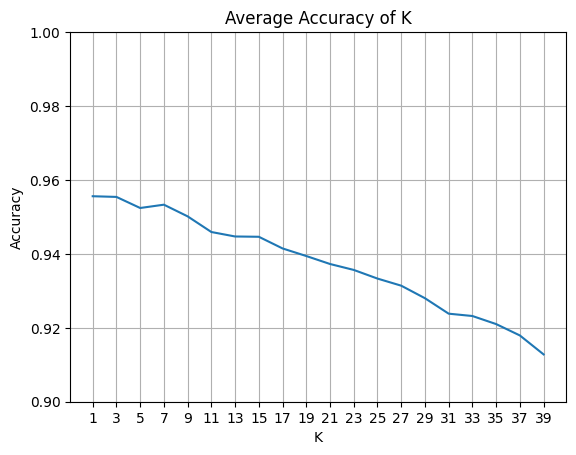

best K : 1 


In [ ]:
# 그래프로 표현
plt.plot(avg_Accuracy_K.index, avg_Accuracy_K['Accuracy'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.ylim(0.9,1.0)
plt.xticks(range(1,40,2))
plt.title('Average Accuracy of K')
plt.grid(True)
plt.show()
print("best K : %d "%(np.argmax(avg_Accuracy_K['Accuracy'])+1))

In [ ]:
best_accuracy_row=df_acc.loc[df_acc['Accuracy'].idxmax()]
print("Best Accuracy: %.4f"%best_accuracy_row['Accuracy'])
print("Best nComponent: %d"%best_accuracy_row['nComponent'])
print("Best k: %d"%best_accuracy_row['k'])

Best Accuracy: 0.9848
Best nComponent: 17
Best k: 1


### Write your justification of your experiment

Hyperparaemter가 좋은걸 어떻게 아는 방법은, 다양한 값을 넣어서 모델의 성능을 측정하고, 가장 좋은 값이 나온 모델을 선택하는것이 맞다고 생각하여, PCA로 차원 축소, KNN 알고리즘을 사용하여 모델 제작 및 성능 측정을 진행 하였습니다.

이 모델에서 Hyperparameter, PCA의 차원은 1 ~ 64 까지 1씩 증가시키고, KNN은 1 ~ 40까지 2씩 증가 시키면서 관찰하였습니다. 그러면 총 64 * 20 = 1280가지 경우를 관찰했다고 볼 수 있습니다.

각 경우에 데하여 평균 Accuracy를 구하고, 관찰하여 어떠한 Hyperparameter에서 좋은 Accuracy가 나오는 지를 보았습니다.

실험을 해본 결과, n_neighbors를 k라고 하고, 실험에 데하여 평균적으로 가장 높은 Accuracy를 기록한 nComponent는 39가 나왔습니다. 실험을 한 모든 nComponent의 가장 높은 Accuracy의 k는 1로 나왔습니다. 그렇지만 이건 평균값이라는 점이 있으므로, 가장 좋은 parameter라고 볼수는 없을것 같습니다.

실제로 가장 좋은 값은 k=1, nComponent=17, Accuracy(0.9848)이 나온걸 볼 수 있습니다.

그리고 k에 데하여 1부터 2씩 증가 시켰을때 accuracy가 점점 감소하는걸 볼 수 있습니다. 이건 k의 값이 커질수록 모델이 underfitting된다고 볼 수 있을거 같습니다.


### Write your best accuracy in Problem 2:  (98.48%)

# Problem 3 (30 pts) - Other Classifiers : 30

- You may use the following classification technique in sklearn:
  - Decision Trees
  - Support Vector Machines (SVM)
  - Perceptron
- We want to classify handwritten digits using a classifier in sklearn
- Use any feature selection technique
- If you choose any hyperparameters and you did any transformation in your data, justify your choice and transformation.
- The justification must be code, data, or plotted images, **not your guess!!!**
- This must be a longer code.
- To justify your choice of hyperparameters, use visualization or plotting whenever possible.
- You may add as many cells as you want.
- To add a cell, insert->insert cell or click '+' button above in the notebook.
- you must set "random_state=0"" in "train_test_split", "TSNE" or on any functions based on random numbers

- sklearn에서 다음 분류 기법을 사용할 수 있습니다:
  - 의사결정 나무
  - SVM(Support Vector Machine)
  - 퍼셉트론
- 우리는 sklearn에서 분류기를 사용하여 손으로 쓴 숫자를 분류하려고 합니다
- 모든 형상 선택 기법 사용
- 하이퍼파라미터를 선택하고 데이터에서 변환을 수행한 경우 선택 및 변환을 정당화합니다.
- 그 이유는 코드, 데이터 또는 도표 이미지여야 합니다. **당신의 추측이 아닙니다
- 이 코드는 더 긴 코드여야 합니다.
- 하이퍼파라미터를 선택한 이유를 정당화하려면 가능한 한 시각화 또는 도표화를 사용합니다.
- 원하는 만큼 셀을 추가할 수 있습니다.
- 셀을 추가하려면 노트북에서 셀을 삽입하거나 위의 '+' 버튼을 클릭합니다.
- "train_test_split", "TSNE" 또는 난수를 기반으로 한 함수에 "random_state=0"을 설정해야 합니다

#### PCA 모델 생성 & DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# PCA 모델 생성
pca = PCA(n_components=17, random_state=0)
# train 데이터에 PCA 적용
X_train_PCA = pca.fit_transform(X_train)
# test 데이터에도 PCA 적용
X_test_PCA = pca.transform(X_test)

acc_list_tree_PCA = []
for max_depth in range(1, 10):
    for min_samples_split in range(2, 10):
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=0)
        model.fit(X_train_PCA, y_train)
        y_predict = model.predict(X_test_PCA)
        accuracy = accuracy_score(y_test, y_predict)
        acc_list_tree_PCA.append([max_depth, min_samples_split, accuracy])

acc_list_tree_PCA = np.array(acc_list_tree_PCA)

#### Decision Tree 분류기 하이퍼파라미터 튜닝

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

acc_list_tree=[]
for max_depth in range(1, 10):
  for min_samples_split in range(2, 10):
    model = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split)
    model.fit(X_train_PCA, y_train)
    y_predict = model.predict(X_test_PCA)
    accuracy = accuracy_score(y_test, y_predict)
    acc_list_tree.append([max_depth, min_samples_split, accuracy])

acc_list_tree = np.array(acc_list_tree)

#### PCA 모델 생성 & SVM Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# PCA 모델 생성
pca = PCA(n_components=17, random_state=0)

# train 데이터에 PCA 적용
X_train_PCA = pca.fit_transform(X_train)

# test 데이터에도 PCA 적용
X_test_PCA = pca.transform(X_test)
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

acc_list_SVC_PCA = []
for C in C_values:
  for gamma in gamma_values:
    model = SVC(C=C, gamma=gamma, random_state=0)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    acc_list_SVC_PCA.append([C, gamma, accuracy])

acc_list_SVC_PCA = np.array(acc_list_SVC_PCA)

#### SVM 분류기 하이퍼파라미터 튜닝

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

acc_list_SVC = []
for C in C_values:
  for gamma in gamma_values:
      model = SVC(C=C, gamma=gamma, random_state=0)
      model.fit(X_train, y_train)
      y_predict = model.predict(X_test)
      accuracy = accuracy_score(y_test, y_predict)
      acc_list_SVC.append([C, gamma, accuracy])

acc_list_SVC = np.array(acc_list_SVC)

#### 각 분류기의 하이퍼파라미터 조합,정확도를 저장한 리스트 Dataframe 변환

In [ ]:
df_acc_tree_PCA = pd.DataFrame(acc_list_tree_PCA, columns=['max_depth', 'min_sample_split', 'Accuracy'])
df_acc_tree = pd.DataFrame(acc_list_tree, columns=['max_depth', 'min_sample_split', 'Accuracy'])
df_acc_SVC_PCA = pd.DataFrame(acc_list_SVC_PCA, columns=['C', 'gamma', 'Accuracy'])
df_acc_SVC = pd.DataFrame(acc_list_SVC, columns=['C', 'gamma', 'Accuracy'])

- PCA를 적용한 데이터와 원본 데이터에 대해 Decision Tree와 SVM 분류기의 정확도를 비교하는 시각화

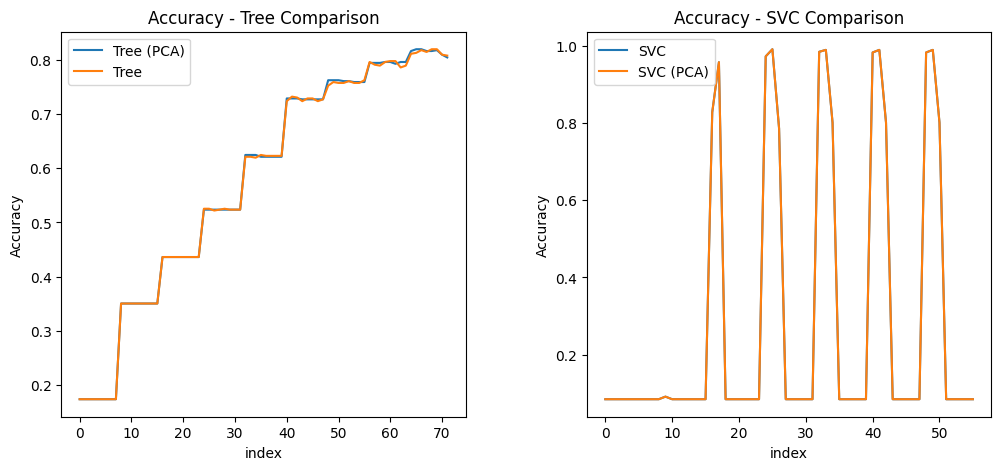

In [ ]:
# 2번의 결과에서 알 수 있듯, 정말 17개정도의 차원이 유효한지 실험
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1행 2열의 서브플롯 생성 및 크기

# 첫 번째 서브플롯: Accuracy - Tree Comparison
axes[0].plot(df_acc_tree_PCA.index, df_acc_tree_PCA['Accuracy'], label='Tree (PCA)')
axes[0].plot(df_acc_tree.index, df_acc_tree['Accuracy'], label='Tree')
axes[0].set_xlabel('index')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy - Tree Comparison')
axes[0].legend()

# 두 번째 서브플롯: Accuracy - SVC Comparison
axes[1].plot(df_acc_SVC.index, df_acc_SVC['Accuracy'], label='SVC')
axes[1].plot(df_acc_SVC_PCA.index, df_acc_SVC_PCA['Accuracy'], label='SVC (PCA)')
axes[1].set_xlabel('index')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy - SVC Comparison')
axes[1].legend()

plt.subplots_adjust(wspace=0.3) # 서브플롯 간의 가로 간격 조정
plt.show()

#### Accuracy by max_depth

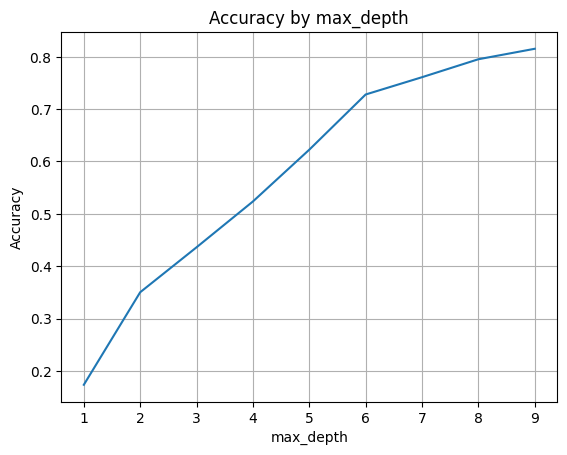

Best max_depth (average case): 9.0


In [ ]:
aveAccdepth = df_acc_tree_PCA.groupby('max_depth')['Accuracy'].mean()
aveAccdepth=pd.DataFrame(aveAccdepth)

plt.plot(aveAccdepth.index,aveAccdepth['Accuracy'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy by max_depth')
#plt.ylim(0.9,1.0)
plt.grid(True)
plt.show()

best_max_depth = aveAccdepth.idxmax()['Accuracy']
print("Best max_depth (average case):", best_max_depth)

#### Accuracy by min_sample_split

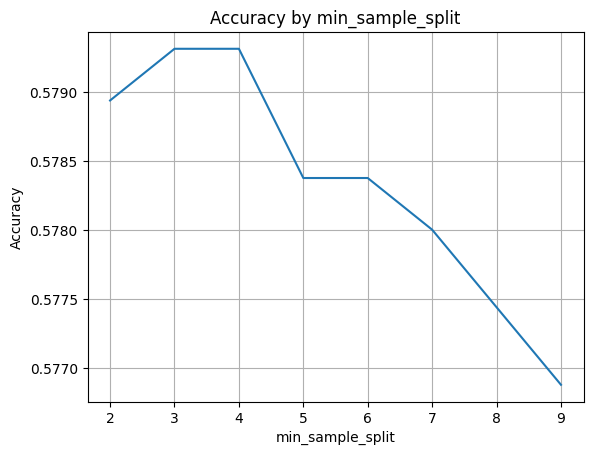

Best min_sample_split (average case): 3.0


In [ ]:
aveAccSample = df_acc_tree_PCA.groupby('min_sample_split')['Accuracy'].mean()
aveAccSample=pd.DataFrame(aveAccSample)

plt.plot(aveAccSample.index,aveAccSample['Accuracy'])
plt.xlabel('min_sample_split')
plt.ylabel('Accuracy')
plt.title('Accuracy by min_sample_split')
#plt.ylim(0.9,1.0)
plt.grid(True)
plt.show()

best_min_sample = aveAccSample.idxmax()['Accuracy']
print("Best min_sample_split (average case):", best_min_sample)

#### Accuracy by C

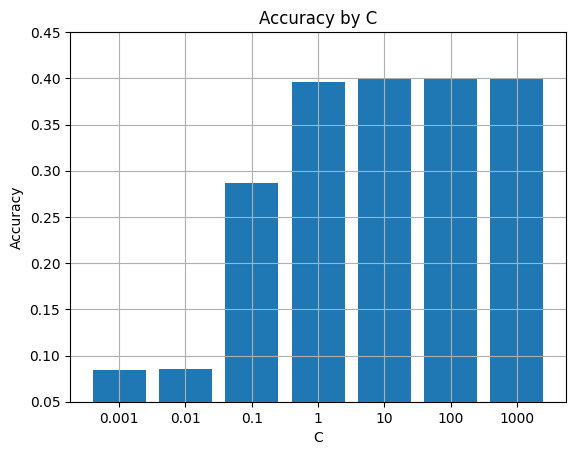

Best C (average case): 10.0


In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

aveAccC = df_acc_SVC_PCA.groupby('C')['Accuracy'].mean()
aveAccC = pd.DataFrame(aveAccC)

plt.grid(True)
plt.bar(range(len(C_values)), aveAccC['Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy by C')
plt.xticks(range(len(C_values)), C_values) # x축 눈금 위치 및 라벨 설정
plt.ylim(0.05, 0.45)
plt.show()

best_C = aveAccC.idxmax()['Accuracy']
print("Best C (average case):", best_C)

#### Accuracy by gamma_value

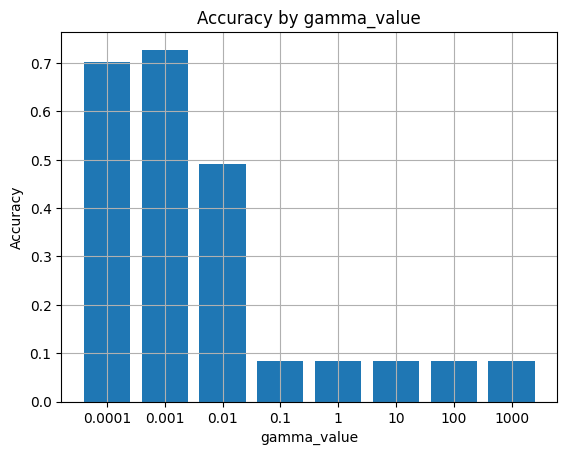

Best gamma_value (average case): 0.001


In [ ]:
gamma_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

aveAccGamma = df_acc_SVC_PCA.groupby('gamma')['Accuracy'].mean()
aveAccGamma = pd.DataFrame(aveAccGamma)
plt.grid(True)
plt.bar(range(len(gamma_values)), aveAccGamma['Accuracy'])
plt.xlabel('gamma_value')
plt.ylabel('Accuracy')
plt.title('Accuracy by gamma_value')
plt.xticks(range(len(gamma_values)), gamma_values) # x축 눈금 위치 및 라벨 설정
#plt.ylim(0.05,0.45)
plt.show()

best_gamma = aveAccGamma.idxmax()['Accuracy']
print("Best gamma_value (average case):", best_gamma)

In [ ]:
best_accuracy_row_SVC=df_acc_SVC_PCA.loc[df_acc_SVC_PCA['Accuracy'].idxmax()]
print("Best Accuracy: %.4f"%best_accuracy_row_SVC['Accuracy'])
print("Best C value: %f"%best_accuracy_row_SVC['C'])
print("Best gamma value: %f"%best_accuracy_row_SVC['gamma'])

Best Accuracy: 0.9916
Best C value: 1.000000
Best gamma value: 0.001000


(To edit, double click this cell)

시험해본건 Decision Tree와 SVM 입니다.

Decision Tree 의 Hyper parameter
max_depth : 트리의 최대 깊이, 1부터 9까지의 범위에서 실험
min_split_sample : 노드를 분할하기 위해 필요한 최소 샘플 수, 2부터 9까지의 범위에 서 실험합니다.
Support Vector Machine의 Hyper parameter
C : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 7개의 값으로
실험했습니다.
gamma : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 7개의 값으로 실험했습니다.

총 3가지의 기준에 대해서 관찰했습니다.
PCA를 통한 차원축소를 할 때, 정말 17개의 차원이 유효한게 맞는지 (여기서 17개의 차원은 2번 실험에서 나온 최적의 값으로 했습니다.)
각각의 하이퍼 파라미터의 값은 어떤 값에서 평균적으로 좋은 성능을 내는지
두 모델의 최종 Accuracy는 어떤 모델이 더 좋은가? 위 세가지 기준에 대해서 관찰하기 위해 각각 그래프를 그려, 비교했습니다.

PCA를 통한 차원축소를 할 때, 정말 17개 정도의 차원이 유효한게 맞는지를 판단하기 위해서 그래프를 관찰해보면, 17개로 차원을 축소한 결과와 원본 데이터의 결과가 완전히 동일합니다.
두 모델 모두에서 Accuracy 그래프가 완전히 겹쳐짐을 관찰할 수 있었는데, 이는 즉, 17개 정도의 차원이 유효함을 의미합니다.

각각의 하이퍼 파라미터의 값은 어떤 값에서 평균적으로 좋은 성능을 내는지는
max_depth의 경우 평균적으로 9정도에서 좋은 성능을 냈음을 관찰할 수 있었고, 실험 범위 내에서는 depth가 점점 깊어질수록 더 좋은 성능을 냄을 볼 수 있었습니다.

min_samle_split의 경우 평균적으로 3 정도에서 좋은 성능을 냈음을 관찰할 수 있었고, 실험 범위 내에서는 2부터 시작하여 3까지는 점점 평균 Accuracy가 증가하고, 4까지는 정체 되었다가, 이후부터는 증가할수록 평균 Accuracy가 감소하는 것을 볼 수 있었습니다.

SVM의 C value의 경우, 평균적으로 10정도에서 좋은 성능을 냈음을 관찰할 수 있었고, 실험 범위 내에서는 C value가 커질수록 더 좋은 성능을 냄을 확인할 수 있었습니다.
또한 0.01 에서 1로, 1에서 10으로 변화할 때, 크게 증가함을 관찰할 수 있었습니다.

gamma value의 경우, 평균적으로 0.001정도에서 좋은 성능을 냈음을 관찰할 수 있었고, 실험 범위 내에서는 gamma의 값이 작아질수록 더 좋은 성능을 냄을 확인할 수 있었습니다.
또한 0.0001에서 0.001로 값이 변화할 때, Accuracy 값 다소 증가, 0.001에서 0.01로 변화할 때, 0.01에서 0.1로 변화할 때 Accuracy가 크게 감소함을 관찰할 수 있었습니다.
그러나 평균적으로 Accuracy가 좋다고 해서, 최적의 파라미터는 아니므로, 가장 Accuracy 가 좋은 hyper parameter 값을 관찰해 보았습니다.

두 가지 모델 성능 비교 Decision Tree는 max_depth가 9이고, min_sample_split가 3일때, 가장 좋은 Accuracy인 0.8199를 가진걸 확인했습니다.

SVM에서는 C가 1.00이고, gamma가 0.001일 때, 가장 좋은
Accuracy인 0.9916을 가졌다고 볼 수 있습니다.



(To edit, double click this cell)

### Write your best accuracy in Problem 3: (99.16%)

## State-of-the-Art of MNIST classification: 99.79%

- https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
- MNIST dataset is much bigger dataset: 60,000 training images and 10,000 testing images

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Submit the this file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills